# Backcasting Demo Notebook

_Loren Champlin_

Adapted from _Adarsh Pyarelal_'s WM 12 Month Evaluation Notebook 

As always, we begin with imports, and print out the commit hash for a rendered
version of the notebook.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import numpy as np
import pandas as pd
from delphi.db import engine
import random as rm
import delphi.evaluation_port as EN
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)
from delphi.cpp.DelphiPython import AnalysisGraph as AG, InitialBeta as IB, RNG
import time
import seaborn as sns
import matplotlib.pyplot as plt
from delphi.jupyter_tools import display

Here I will set random seeds

In [2]:
np.random.seed(87)
rm.seed(87)

In [3]:
G = AG.from_json_file("../scripts/data/raw/wm_12_month_evaluation/jsonld-merged20190404.json",0.71,0.0)

In [4]:
G.print_indicators()

In [5]:
G.remove_node("UN/events/human/physical_insecurity")
G.remove_node("UN/events/nature_impact/climate_change_mitigation")
G.remove_node("UN/interventions/provision_of_goods_and_services")
G.remove_node("UN/entities/human/infrastructure/transportation/transportation_methods")
G.remove_node("UN/entities/human/government/government_actions/duty")

In [6]:
H = G.get_subgraph_for_concept("UN/events/human/human_migration",10,True)

In [7]:
H.construct_beta_pdfs()

In [8]:
#H.prune(3)

In [9]:
H.print_indicators()

In [10]:
H.map_concepts_to_indicators()

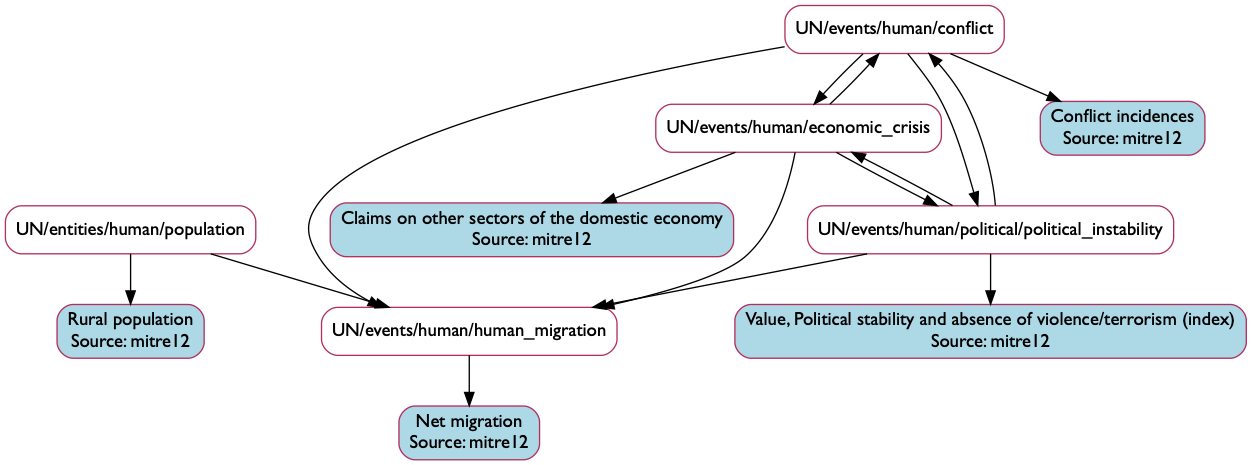

In [11]:
display(H)

In [12]:
H.to_png()

In [15]:
query = " ".join(
        [
            f"select * from indicator",
            f"where `Variable` like 'New asylum seeking applicants'",
        ]
    )

results = engine.execute(query)

df_results = pd.DataFrame(results,columns=results.keys())
df_results

,index,Country,County,Month,Source,State,Unit,Value,Variable,Year
0,15586,South Sudan,None,7,UNHCR,None,applicants,1,New asylum seeking applicants,2011
1,15587,South Sudan,None,9,UNHCR,None,applicants,1,New asylum seeking applicants,2011
2,15588,South Sudan,None,11,UNHCR,None,applicants,1,New asylum seeking applicants,2011
3,15589,South Sudan,None,12,UNHCR,None,applicants,3,New asylum seeking applicants,2011
4,15590,South Sudan,None,1,UNHCR,None,applicants,4,New asylum seeking applicants,2012
5,15591,South Sudan,None,2,UNHCR,None,applicants,2,New asylum seeking applicants,2012
6,15592,South Sudan,None,3,UNHCR,None,applicants,8,New asylum seeking applicants,2012
7,15593,South Sudan,None,4,UNHCR,None,applicants,1,New asylum seeking applicants,2012
8,15594,South Sudan,None,5,UNHCR,None,applicants,1,New asylum seeking applicants,2012
9,15595,South Sudan,None,6,UNHCR,None,applicants,4,New asylum seeking applicants,2012
